In [1]:
import pandas as pd
import sys
import gzip
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#stations_file = sys.argv[1]
#city_file= sys.argv[2]
#output_file = sys.argv[3]

In [3]:
stations_file="stations.json.gz"
city_file = "city_data.csv"
output_file = "output.svg"

In [4]:
stations = pd.read_json(stations_file, lines=True)
stations['avg_tmax']=stations['avg_tmax']/10
city_data =pd.read_csv(city_file)
stations

,observations,avg_tmax,station,latitude,longitude,elevation
0,300,10.201667,CA001092970,54.4500,-124.2833,691.0
1,320,13.930937,CA003030529,50.0333,-113.2167,967.0
2,273,12.355311,CA004038116,49.0000,-108.3833,902.0
3,220,14.597727,CA007016840,46.5833,-72.2333,16.0
4,326,21.910429,USC00033466,34.5128,-93.0486,190.8
...,...,...,...,...,...,...
9414,366,15.477049,USW00024130,44.8428,-117.8086,1024.4
9415,366,15.690164,USW00054756,42.5700,-72.2911,169.2
9416,366,15.534699,USW00054791,43.2781,-70.9222,98.5
9417,352,18.325852,USW00093786,38.3083,-75.1239,3.7


In [5]:
city_data.dropna(subset=["population"],inplace=True)
city_data.dropna(subset=["area"],inplace=True)
city_data['area']=city_data['area']/1000000
city_data = city_data[city_data.area <= 10000]
city_data=city_data.reset_index(drop=True)
city_data['density']=city_data['population']/city_data['area']

In [6]:
def distance(city, stations):
    from math import radians, cos, sin, asin, sqrt, pi
    R = 6371 # Radius of the earth in km
  
    dLat = np.deg2rad(stations['latitude'] - city['latitude'])
    dLon = np.deg2rad(stations['longitude'] - city['longitude'])
    #a = np.sin(dLat/2) * np.sin(dLat/2)+np.cos(np.deg2rad(lat1)) * np.cos(np.deg2rad(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
    x =0.5 -np.cos(dLat)/2+np.cos(np.deg2rad(city['latitude']))* np.cos(np.deg2rad(stations['latitude'])) * (1-np.cos(dLon))/2
    y = 2*R * np.arcsin(np.sqrt(x))
    
    return(y)

In [7]:
def best_tmax(city, stations):
    stations['distance'] = distance(city, stations)
    station = stations[stations['distance'] == stations['distance'].min()]
    station = station.reset_index(drop= True)

    result = station.loc[0, 'avg_tmax']

    return result


In [8]:
city_data['avg_tmax'] = city_data.apply(best_tmax, axis=1, stations=stations)

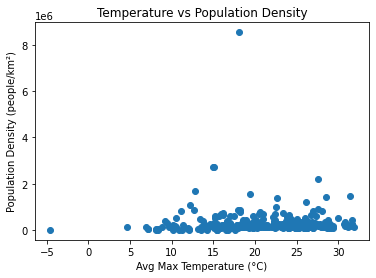

In [9]:
plt.scatter(city_data['avg_tmax'], city_data['population'])
plt.title('Temperature vs Population Density')
plt.xlabel('Avg Max Temperature (\u00b0C)')
plt.ylabel('Population Density (people/km\u00b2)')
plt.savefig(output_file)